In [67]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Regressions sur panel final

In [68]:
panel_237 = pd.read_csv('panel_database238.csv')
panel_237

,siren,division,dateCreationUniteLegale,annee,brevets,CIR,idEti
0,300560588,20,1900,2016,6.0,0.00,1
1,302456199,62,1985,2016,1.0,3439257.00,1
2,304849094,71,1982,2016,0.0,32280.87,1
3,305151409,21,1900,2016,4.0,7946000.00,1
4,306926684,26,1976,2016,0.0,0.00,1
...,...,...,...,...,...,...,...
1180,790020846,71,2012,2020,3.0,0.00,1
1181,790503973,62,2013,2020,0.0,149519.00,0
1182,791567092,22,2013,2020,0.0,828108.00,1
1183,796380426,25,1963,2020,0.0,515000.00,1


In [69]:
panel_237['CIR'] = panel_237['CIR']/1000000
panel_237 ['RetD'] = panel_237['CIR'].apply(lambda x: x / 0.3 if x <= 30 else (x - 25) / 0.05)
panel_237['division'] = panel_237['division'].astype(str)
panel_237['idEti'] = panel_237['idEti'].astype(str)
panel_237

,siren,division,dateCreationUniteLegale,annee,brevets,CIR,idEti,RetD
0,300560588,20,1900,2016,6.0,0.000000,1,0.000000
1,302456199,62,1985,2016,1.0,3.439257,1,11.464190
2,304849094,71,1982,2016,0.0,0.032281,1,0.107603
3,305151409,21,1900,2016,4.0,7.946000,1,26.486667
4,306926684,26,1976,2016,0.0,0.000000,1,0.000000
...,...,...,...,...,...,...,...,...
1180,790020846,71,2012,2020,3.0,0.000000,1,0.000000
1181,790503973,62,2013,2020,0.0,0.149519,0,0.498397
1182,791567092,22,2013,2020,0.0,0.828108,1,2.760360
1183,796380426,25,1963,2020,0.0,0.515000,1,1.716667


In [70]:
model = smf.ols('np.log(1+brevets) ~ 1+ RetD*C(division, Treatment("72"))+ C(annee) + C(idEti, Treatment("0")) + dateCreationUniteLegale', data=panel_237)

# Ajuster le modèle
result = model.fit()

# Résumé des résultats
print(result.summary())

                             OLS Regression Results                            
Dep. Variable:     np.log(1 + brevets)   R-squared:                       0.432
Model:                             OLS   Adj. R-squared:                  0.419
Method:                  Least Squares   F-statistic:                     32.64
Date:                 Fri, 22 Nov 2024   Prob (F-statistic):          3.66e-122
Time:                         09:45:54   Log-Likelihood:                -1729.1
No. Observations:                 1185   AIC:                             3514.
Df Residuals:                     1157   BIC:                             3656.
Df Model:                           27                                         
Covariance Type:             nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [71]:
panel_237['RetD_CF'] =panel_237['RetD']-panel_237['CIR']
# Créez une copie du DataFrame original
data_for_prediction = panel_237.copy()

# Remplacez la colonne 'RetD' par les valeurs de 'RetD_CF'
data_for_prediction['RetD'] = data_for_prediction['RetD_CF']

# Faites les prédictions avec le modèle en utilisant cette version modifiée des données
predictions = result.predict(data_for_prediction)
#panel_2018['nb_brevets_predits']
data_for_prediction['nb_brevets_CF'] = predictions
data_for_prediction['nb_brevets_CF'] = np.exp(data_for_prediction['nb_brevets_CF'])-1
# Affichez les prédictions
data_for_prediction

,siren,division,dateCreationUniteLegale,annee,brevets,CIR,idEti,RetD,RetD_CF,nb_brevets_CF
0,300560588,20,1900,2016,6.0,0.000000,1,0.000000,0.000000,1.928162
1,302456199,62,1985,2016,1.0,3.439257,1,8.024933,8.024933,0.454218
2,304849094,71,1982,2016,0.0,0.032281,1,0.075322,0.075322,0.400806
3,305151409,21,1900,2016,4.0,7.946000,1,18.540667,18.540667,1.651767
4,306926684,26,1976,2016,0.0,0.000000,1,0.000000,0.000000,2.157840
...,...,...,...,...,...,...,...,...,...,...
1180,790020846,71,2012,2020,3.0,0.000000,1,0.000000,0.000000,-0.057433
1181,790503973,62,2013,2020,0.0,0.149519,0,0.348878,0.348878,0.952253
1182,791567092,22,2013,2020,0.0,0.828108,1,1.932252,1.932252,0.770410
1183,796380426,25,1963,2020,0.0,0.515000,1,1.201667,1.201667,0.384816


In [72]:
data_for_prediction ['delta_nb_brevets'] =-(data_for_prediction['nb_brevets_CF']- data_for_prediction['brevets'])

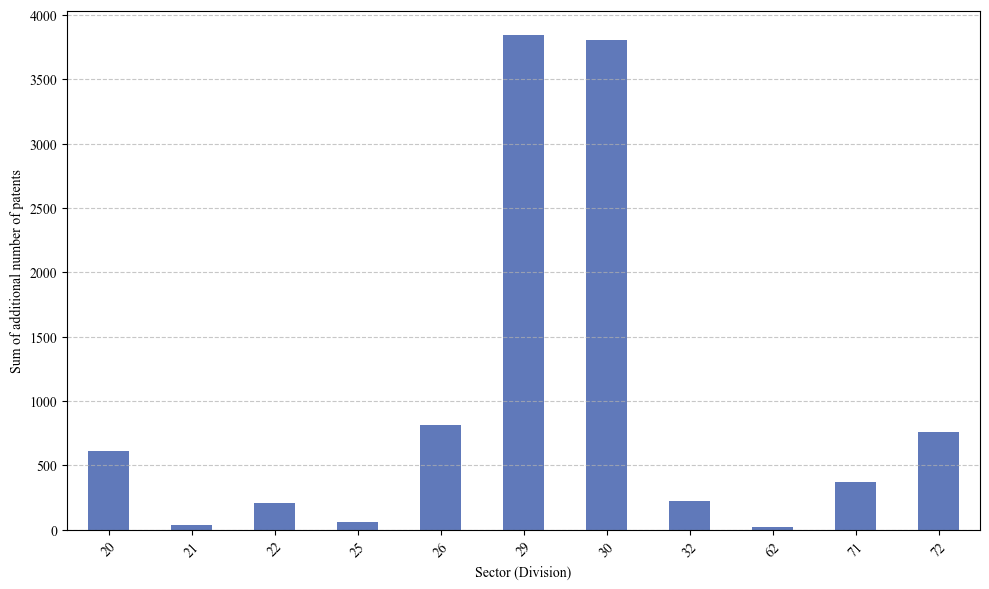

In [73]:
df_final = data_for_prediction.groupby('division')['delta_nb_brevets'].sum()

plt.rc('font', family='Times New Roman')
# Créer un bar chart pour afficher la somme de delta_nb_brevets par secteur
plt.figure(figsize=(10, 6))
df_final.plot(kind='bar', color='#6079BA')  # Utilisation d'un bar chart
plt.xlabel('Sector (Division)')
plt.ylabel('Sum of additional number of patents')
plt.xticks(rotation=45)  # Rotation des labels des secteurs pour la lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajouter des lignes de grille
plt.tight_layout()  # Ajuster la disposition pour éviter le chevauchement
plt.show()

In [74]:
df_final

division
20     613.187751
21      34.381420
22     207.159479
25      57.462215
26     810.237756
29    3840.776791
30    3807.351826
32     222.589131
62      19.472243
71     366.900219
72     761.975321
Name: delta_nb_brevets, dtype: float64

In [75]:
# Calculer la somme de CIR et delta_nb_brevets par siren
sums_by_siren = data_for_prediction.groupby('siren')[['CIR', 'delta_nb_brevets']].sum()

# Afficher les résultats
sums_by_siren


,CIR,delta_nb_brevets
siren,,
300560588,0.692881,4.448221
302456199,4.251904,1.060927
304849094,0.364906,1.464190
305151409,59.904000,5.417245
306926684,0.750000,-6.446453
...,...,...
871500229,0.098259,4.709736
897080289,23.620405,26.539520
950020180,0.541326,-0.735770


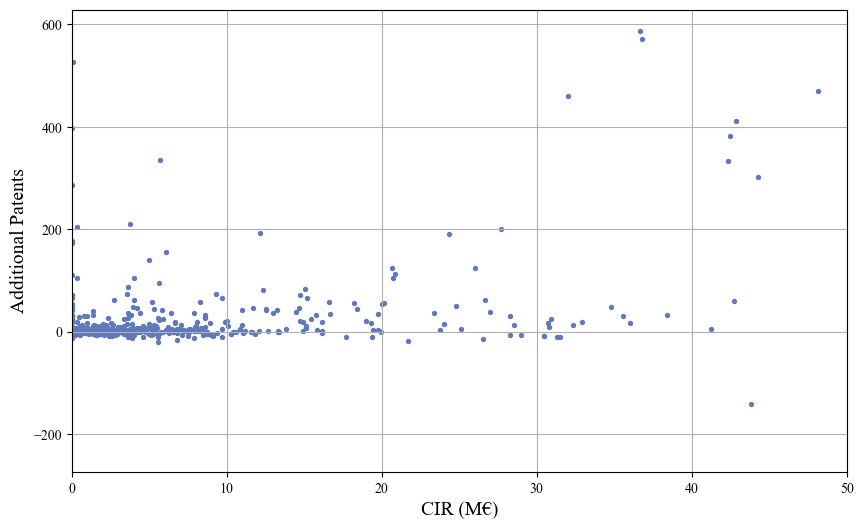

In [76]:
# Définir une police spécifique (par exemple, "Times New Roman")
plt.rc('font', family='Times New Roman')

# Exemple de graphique
plt.figure(figsize=(10, 6))
plt.scatter(data_for_prediction['CIR'], data_for_prediction['delta_nb_brevets'], s=8, c='#6079BA')

plt.xlabel('CIR (M€)', fontsize=14)  # Modifier la taille et la police
plt.ylabel('Additional Patents', fontsize=14)
plt.xlim(0, 50)  # Limite pour l'axe des X
plt.grid(True)
plt.show()

In [77]:
data_for_prediction['brevets'].sum()
data_for_prediction['delta_nb_brevets'].sum()

10741.494152101583

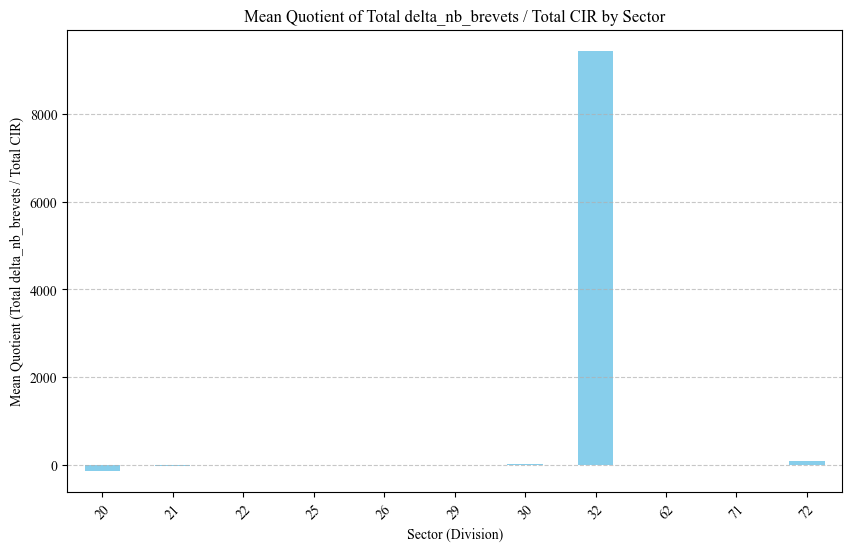

In [78]:
# Étape 1 : Calculer la somme de delta_nb_brevets et CIR par entreprise (siren)
sums_by_siren = data_for_prediction.groupby('siren').agg(
    total_delta_nb_brevets=('delta_nb_brevets', 'sum'),
    total_CIR=('CIR', 'sum'),
    division=('division', 'first')  # on garde la division associée au siren
)

# Étape 2 : Calculer le rapport des sommes pour chaque entreprise
sums_by_siren['quotient'] = sums_by_siren['total_delta_nb_brevets'] / sums_by_siren['total_CIR']
#mean_quotient_by_sector_filtered = mean_quotient_by_sector.drop(labels=32, errors='ignore')
# Étape 3 : Calculer la moyenne du quotient par secteur (division)
mean_quotient_by_sector = sums_by_siren.groupby('division')['quotient'].mean()
#mean_quotient_by_sector_filtered = mean_quotient_by_sector.drop(labels='32', errors='ignore')
# Étape 4 : Représenter la moyenne par secteur avec un bar chart


plt.figure(figsize=(10, 6))
mean_quotient_by_sector.plot(kind='bar', color='skyblue')
plt.title("Mean Quotient of Total delta_nb_brevets / Total CIR by Sector")
plt.xlabel("Sector (Division)")
plt.ylabel("Mean Quotient (Total delta_nb_brevets / Total CIR)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [79]:
import pandas as pd
from tabulate import tabulate  # Assurez-vous d'importer la fonction `tabulate`

# Étape 1 : Calculer la somme de delta_nb_brevets et CIR par entreprise (siren)
sums_by_siren = data_for_prediction.groupby('siren').agg(
    total_delta_nb_brevets=('delta_nb_brevets', 'sum'),
    total_CIR=('CIR', 'sum'),
    division=('division', 'first')  # on garde la division associée au siren
)

# Étape 2 : Calculer le rapport des sommes pour chaque entreprise
sums_by_siren['quotient'] = (sums_by_siren['total_delta_nb_brevets'] / sums_by_siren['total_CIR'])

# Étape 3 : Calculer la moyenne du quotient par secteur (division)
mean_quotient_by_sector = sums_by_siren.groupby('division')['quotient'].mean()

# Créer un tableau avec la somme des CIR et des brevets par secteur
sector_summary = sums_by_siren.groupby('division').agg(
    mean_quotient=('quotient', 'mean')
)

# Affichage du tableau avec les résultats
# Convertir le DataFrame en format tableau lisible
print("\nSummary Table of the mean per sector of additional patents for each million unit of CI")
print(tabulate(sector_summary, headers='keys', tablefmt='pretty', showindex=True))



Summary Table of the mean per sector of additional patents for each million unit of CI
+----------+---------------------+
| division |    mean_quotient    |
+----------+---------------------+
|    20    | -125.7054446971476  |
|    21    | -12.182109038671438 |
|    22    | -2.9774734076393155 |
|    25    |  9.315987346764564  |
|    26    | 0.14775297349571626 |
|    29    | -0.8692415820211358 |
|    30    |  30.2856568291253   |
|    32    |  9436.07181535451   |
|    62    | -1.5346815691483149 |
|    71    | -6.714559111637122  |
|    72    |  92.62375895639934  |
+----------+---------------------+


In [80]:
# Étape 1 : Calculer la somme de delta_nb_brevets et CIR par entreprise (siren)
sums_by_siren = data_for_prediction.groupby('siren').agg(
    total_delta_nb_brevets=('delta_nb_brevets', 'sum'),
    total_CIR=('CIR', 'sum'),
    division=('division', 'first'),
    Id_ETI = ('idEti', 'first') # on garde la division associée au siren
)

# Étape 2 : Calculer le rapport des sommes pour chaque entreprise
sums_by_siren['quotient'] = sums_by_siren['total_delta_nb_brevets'] / sums_by_siren['total_CIR']

# Étape 3 : Calculer la moyenne du quotient par secteur (division)
mean_quotient_by_sector = sums_by_siren.groupby('Id_ETI')['quotient'].mean()

# Créer un tableau avec la somme des CIR et des brevets par secteur
sector_summary = sums_by_siren.groupby('Id_ETI').agg(
    mean_quotient=('quotient', 'mean')
)

# Affichage du tableau avec les résultats
# Convertir le DataFrame en format tableau lisible
print("\nSummary Table per size of company:")
print(tabulate(sector_summary, headers='keys', tablefmt='pretty', showindex=True))



Summary Table per size of company:
+--------+---------------------+
| Id_ETI |    mean_quotient    |
+--------+---------------------+
|   0    | 1591.2941250542872  |
|   1    | -3.9205291955005412 |
+--------+---------------------+


# Regression avec decalage temporel

In [81]:
panel_237_1 = pd.read_csv('panel_database238.csv')
panel_237_1['CIR'] = panel_237_1['CIR']/1000000
panel_237_1 ['RetD'] = panel_237_1['CIR'].apply(lambda x: x / 0.3 if x <= 30 else (x - 25) / 0.05)
panel_237_1['division'] = panel_237_1['division'].astype(str)
panel_237_1['idEti'] = panel_237_1['idEti'].astype(str)
# 1. Décaler `CIR` de 1 an pour chaque `siren` en utilisant l'index multi-niveau
panel_237_1['RetD_t_1'] = panel_237_1.groupby('siren')['RetD'].shift(1)
panel_237_1['CIR_t_1'] = panel_237_1.groupby('siren')['CIR'].shift(1)
# 2. Supprimer les lignes avec des valeurs manquantes dans `CIR_t_1` et `nb_brevets`
panel_237_1= panel_237_1.dropna(subset=['RetD_t_1', 'brevets'])

panel_237_1

,siren,division,dateCreationUniteLegale,annee,brevets,CIR,idEti,RetD,RetD_t_1,CIR_t_1
237,300560588,20,1900,2017,3.0,0.368934,1,1.229780,0.000000,0.000000
238,302456199,62,1985,2017,0.0,0.812647,1,2.708823,11.464190,3.439257
239,304849094,71,1982,2017,0.0,0.097396,1,0.324653,0.107603,0.032281
240,305151409,21,1900,2017,5.0,23.777000,1,79.256667,26.486667,7.946000
241,306926684,26,1976,2017,1.0,0.000000,1,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1180,790020846,71,2012,2020,3.0,0.000000,1,0.000000,0.000000,0.000000
1181,790503973,62,2013,2020,0.0,0.149519,0,0.498397,0.613363,0.184009
1182,791567092,22,2013,2020,0.0,0.828108,1,2.760360,3.344493,1.003348
1183,796380426,25,1963,2020,0.0,0.515000,1,1.716667,2.723333,0.817000


In [82]:
model = smf.ols('np.log(1+brevets) ~ 1+ RetD_t_1 +RetD*C(division, Treatment("72"))+ C(annee) + C(idEti, Treatment("0")) + dateCreationUniteLegale', data=panel_237_1)

# Ajuster le modèle
result = model.fit()

# Résumé des résultats
print(result.summary())

                             OLS Regression Results                            
Dep. Variable:     np.log(1 + brevets)   R-squared:                       0.453
Model:                             OLS   Adj. R-squared:                  0.436
Method:                  Least Squares   F-statistic:                     28.16
Date:                 Fri, 22 Nov 2024   Prob (F-statistic):          3.14e-101
Time:                         09:45:56   Log-Likelihood:                -1347.8
No. Observations:                  948   AIC:                             2752.
Df Residuals:                      920   BIC:                             2887.
Df Model:                           27                                         
Covariance Type:             nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [83]:
panel_237_1['RetD_CF'] =panel_237_1['RetD']-panel_237_1['CIR']
panel_237_1['RetD_CF_1'] =panel_237_1['RetD_t_1']-panel_237_1['CIR_t_1']
panel_237_1

,siren,division,dateCreationUniteLegale,annee,brevets,CIR,idEti,RetD,RetD_t_1,CIR_t_1,RetD_CF,RetD_CF_1
237,300560588,20,1900,2017,3.0,0.368934,1,1.229780,0.000000,0.000000,0.860846,0.000000
238,302456199,62,1985,2017,0.0,0.812647,1,2.708823,11.464190,3.439257,1.896176,8.024933
239,304849094,71,1982,2017,0.0,0.097396,1,0.324653,0.107603,0.032281,0.227257,0.075322
240,305151409,21,1900,2017,5.0,23.777000,1,79.256667,26.486667,7.946000,55.479667,18.540667
241,306926684,26,1976,2017,1.0,0.000000,1,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1180,790020846,71,2012,2020,3.0,0.000000,1,0.000000,0.000000,0.000000,0.000000,0.000000
1181,790503973,62,2013,2020,0.0,0.149519,0,0.498397,0.613363,0.184009,0.348878,0.429354
1182,791567092,22,2013,2020,0.0,0.828108,1,2.760360,3.344493,1.003348,1.932252,2.341145
1183,796380426,25,1963,2020,0.0,0.515000,1,1.716667,2.723333,0.817000,1.201667,1.906333


In [84]:
# Créez une copie du DataFrame original
data_for_prediction_1 = panel_237_1.copy()
# Remplacez la colonne 'RetD' par les valeurs de 'RetD_CF'
data_for_prediction_1['RetD'] = data_for_prediction_1['RetD_CF']
data_for_prediction_1['RetD_t_1'] = data_for_prediction_1['RetD_CF_1']
# Faites les prédictions avec le modèle en utilisant cette version modifiée des données
predictions = result.predict(data_for_prediction_1)
#panel_2018['nb_brevets_predits']
data_for_prediction_1['nb_brevets_CF'] = predictions
data_for_prediction_1['nb_brevets_CF'] = np.exp(data_for_prediction_1['nb_brevets_CF'])-1
data_for_prediction_1

,siren,division,dateCreationUniteLegale,annee,brevets,CIR,idEti,RetD,RetD_t_1,CIR_t_1,RetD_CF,RetD_CF_1,nb_brevets_CF
237,300560588,20,1900,2017,3.0,0.368934,1,0.860846,0.000000,0.000000,0.860846,0.000000,1.331795
238,302456199,62,1985,2017,0.0,0.812647,1,1.896176,8.024933,3.439257,1.896176,8.024933,0.016597
239,304849094,71,1982,2017,0.0,0.097396,1,0.227257,0.075322,0.032281,0.227257,0.075322,0.184955
240,305151409,21,1900,2017,5.0,23.777000,1,55.479667,18.540667,7.946000,55.479667,18.540667,1.630804
241,306926684,26,1976,2017,1.0,0.000000,1,0.000000,0.000000,0.000000,0.000000,0.000000,1.482874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,790020846,71,2012,2020,3.0,0.000000,1,0.000000,0.000000,0.000000,0.000000,0.000000,-0.016591
1181,790503973,62,2013,2020,0.0,0.149519,0,0.348878,0.429354,0.184009,0.348878,0.429354,0.915470
1182,791567092,22,2013,2020,0.0,0.828108,1,1.932252,2.341145,1.003348,1.932252,2.341145,0.721559
1183,796380426,25,1963,2020,0.0,0.515000,1,1.201667,1.906333,0.817000,1.201667,1.906333,0.365157


In [85]:
data_for_prediction_1 ['delta_nb_brevets'] =-(data_for_prediction_1['nb_brevets_CF']- data_for_prediction_1['brevets'])
data_for_prediction_1

,siren,division,dateCreationUniteLegale,annee,brevets,CIR,idEti,RetD,RetD_t_1,CIR_t_1,RetD_CF,RetD_CF_1,nb_brevets_CF,delta_nb_brevets
237,300560588,20,1900,2017,3.0,0.368934,1,0.860846,0.000000,0.000000,0.860846,0.000000,1.331795,1.668205
238,302456199,62,1985,2017,0.0,0.812647,1,1.896176,8.024933,3.439257,1.896176,8.024933,0.016597,-0.016597
239,304849094,71,1982,2017,0.0,0.097396,1,0.227257,0.075322,0.032281,0.227257,0.075322,0.184955,-0.184955
240,305151409,21,1900,2017,5.0,23.777000,1,55.479667,18.540667,7.946000,55.479667,18.540667,1.630804,3.369196
241,306926684,26,1976,2017,1.0,0.000000,1,0.000000,0.000000,0.000000,0.000000,0.000000,1.482874,-0.482874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,790020846,71,2012,2020,3.0,0.000000,1,0.000000,0.000000,0.000000,0.000000,0.000000,-0.016591,3.016591
1181,790503973,62,2013,2020,0.0,0.149519,0,0.348878,0.429354,0.184009,0.348878,0.429354,0.915470,-0.915470
1182,791567092,22,2013,2020,0.0,0.828108,1,1.932252,2.341145,1.003348,1.932252,2.341145,0.721559,-0.721559
1183,796380426,25,1963,2020,0.0,0.515000,1,1.201667,1.906333,0.817000,1.201667,1.906333,0.365157,-0.365157


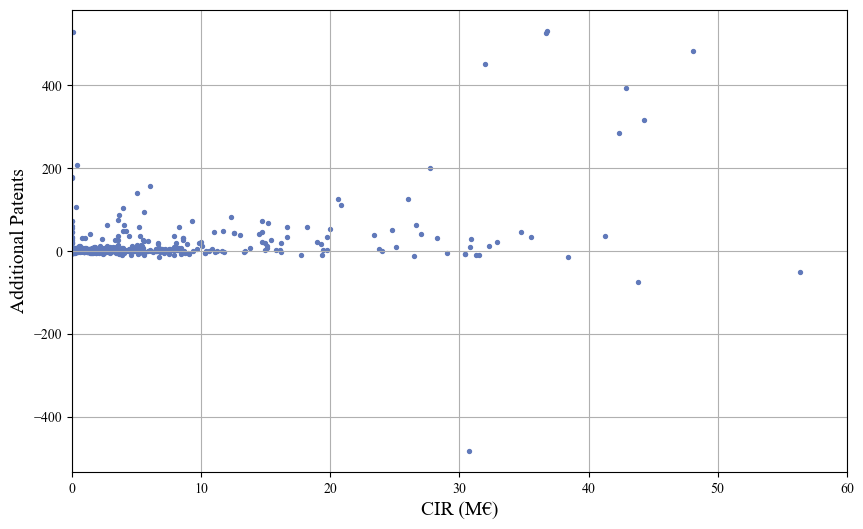

In [86]:
import matplotlib.pyplot as plt

# Définir une police spécifique (par exemple, "Times New Roman")
plt.rc('font', family='Times New Roman')

# Exemple de graphique
plt.figure(figsize=(10, 6))
plt.scatter(data_for_prediction_1['CIR'], data_for_prediction_1['delta_nb_brevets'], s=8, c='#6079BA')

plt.xlabel('CIR (M€)', fontsize=14)  # Modifier la taille et la police
plt.ylabel('Additional Patents', fontsize=14)
plt.xlim(0, 60)  # Limite pour l'axe des X

plt.grid(True)
plt.show()

In [87]:
import pandas as pd
from tabulate import tabulate  # Assurez-vous d'importer la fonction `tabulate`

# Étape 1 : Calculer la somme de delta_nb_brevets et CIR par entreprise (siren)
sums_by_siren = data_for_prediction_1.groupby('siren').agg(
    total_delta_nb_brevets=('delta_nb_brevets', 'sum'),
    total_CIR=('CIR', 'sum'),
    division=('division', 'first')  # on garde la division associée au siren
)

sums_by_siren = sums_by_siren[sums_by_siren['total_CIR'] != 0]

In [88]:
# Étape 2 : Calculer le rapport des sommes pour chaque entreprise
sums_by_siren['quotient'] = (sums_by_siren['total_delta_nb_brevets'] / sums_by_siren['total_CIR'])

# Étape 3 : Calculer la moyenne du quotient par secteur (division)
mean_quotient_by_sector = sums_by_siren.groupby('division')['quotient'].mean()

# Créer un tableau avec la somme des CIR et des brevets par secteur
sector_summary = sums_by_siren.groupby('division').agg(
    mean_quotient=('quotient', 'mean')
)

# Affichage du tableau avec les résultats
# Convertir le DataFrame en format tableau lisible
print("\nSummary Table of the mean per sector of additional patents for each million unit of CI")
print(tabulate(sector_summary, headers='keys', tablefmt='pretty', showindex=True))



Summary Table of the mean per sector of additional patents for each million unit of CI
+----------+---------------------+
| division |    mean_quotient    |
+----------+---------------------+
|    20    | 3.0423619380047358  |
|    21    | -13.314365049375219 |
|    22    | -6.697443019884205  |
|    25    |  6.632676080384563  |
|    26    | 0.33050484165228067 |
|    29    | -0.6731487106568352 |
|    30    | 23.596681847690803  |
|    32    |  8258.163175343156  |
|    62    | -1.1939245129560359 |
|    71    | -3.9634859474780644 |
|    72    | 241.12806730002788  |
+----------+---------------------+


In [89]:
# Étape 1 : Calculer la somme de delta_nb_brevets et CIR par entreprise (siren)
sums_by_siren = data_for_prediction_1.groupby('siren').agg(
    total_delta_nb_brevets=('delta_nb_brevets', 'sum'),
    total_CIR=('CIR', 'sum'),
    division=('division', 'first'),
    Id_ETI = ('idEti', 'first') # on garde la division associée au siren
)
sums_by_siren = sums_by_siren[sums_by_siren['total_CIR'] != 0]
# Étape 2 : Calculer le rapport des sommes pour chaque entreprise
sums_by_siren['quotient'] = sums_by_siren['total_delta_nb_brevets'] / sums_by_siren['total_CIR']

# Étape 3 : Calculer la moyenne du quotient par secteur (division)
mean_quotient_by_sector = sums_by_siren.groupby('Id_ETI')['quotient'].mean()

# Créer un tableau avec la somme des CIR et des brevets par secteur
sector_summary = sums_by_siren.groupby('Id_ETI').agg(
    mean_quotient=('quotient', 'mean')
)

# Affichage du tableau avec les résultats
# Convertir le DataFrame en format tableau lisible
print("\nSummary Table per size of company:")
print(tabulate(sector_summary, headers='keys', tablefmt='pretty', showindex=True))



Summary Table per size of company:
+--------+--------------------+
| Id_ETI |   mean_quotient    |
+--------+--------------------+
|   0    | 1401.5653980827733 |
|   1    | -4.106187722181946 |
+--------+--------------------+


# Prise en compte de des deux années précédentes

In [90]:
panel_237_2 = pd.read_csv('panel_database238.csv')
panel_237_2['CIR'] = panel_237_2['CIR']/1000000
panel_237_2 ['RetD'] = panel_237_2['CIR'].apply(lambda x: x / 0.3 if x <= 30 else (x - 25) / 0.05)
panel_237_2['division'] = panel_237_2['division'].astype(str)
panel_237_2['idEti'] = panel_237_2['idEti'].astype(str)
# 1. Décaler `CIR` de 1 an pour chaque `siren` en utilisant l'index multi-niveau
panel_237_2['RetD_t_1'] = panel_237_2.groupby('siren')['RetD'].shift(1)
panel_237_2['CIR_t_1'] = panel_237_2.groupby('siren')['CIR'].shift(1)
panel_237_2['CIR_t_2'] = panel_237_2.groupby('siren')['CIR'].shift(2)
# 1. Décaler `CIR` de 1 an pour chaque `siren` en utilisant l'index multi-niveau
panel_237_2['RetD_t_2'] = panel_237_2.groupby('siren')['RetD'].shift(2)
# 2. Supprimer les lignes avec des valeurs manquantes dans `CIR_t_1` et `nb_brevets`

panel_237_2= panel_237_2.dropna(subset=['RetD_t_1','RetD_t_2' , 'brevets'])
panel_237_2

,siren,division,dateCreationUniteLegale,annee,brevets,CIR,idEti,RetD,RetD_t_1,CIR_t_1,CIR_t_2,RetD_t_2
474,300560588,20,1900,2018,1.0,0.323947,1,1.079823,1.229780,0.368934,0.000000,0.000000
475,302456199,62,1985,2018,0.0,0.000000,1,0.000000,2.708823,0.812647,3.439257,11.464190
476,304849094,71,1982,2018,0.0,0.078067,1,0.260223,0.324653,0.097396,0.032281,0.107603
477,305151409,21,1900,2018,2.0,7.152000,1,23.840000,79.256667,23.777000,7.946000,26.486667
478,306926684,26,1976,2018,0.0,0.750000,1,2.500000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1180,790020846,71,2012,2020,3.0,0.000000,1,0.000000,0.000000,0.000000,0.000000,0.000000
1181,790503973,62,2013,2020,0.0,0.149519,0,0.498397,0.613363,0.184009,0.183142,0.610473
1182,791567092,22,2013,2020,0.0,0.828108,1,2.760360,3.344493,1.003348,1.003348,3.344493
1183,796380426,25,1963,2020,0.0,0.515000,1,1.716667,2.723333,0.817000,0.508000,1.693333


In [91]:
model = smf.ols('np.log(1+brevets) ~ 1+ RetD_t_1+ RetD_t_2 +RetD*C(division, Treatment("72"))+ C(annee) + C(idEti, Treatment("0")) + dateCreationUniteLegale', data=panel_237_2)

# Ajuster le modèle
result = model.fit()

# Résumé des résultats
print(result.summary())

                             OLS Regression Results                            
Dep. Variable:     np.log(1 + brevets)   R-squared:                       0.492
Model:                             OLS   Adj. R-squared:                  0.472
Method:                  Least Squares   F-statistic:                     24.48
Date:                 Fri, 22 Nov 2024   Prob (F-statistic):           2.09e-82
Time:                         09:45:58   Log-Likelihood:                -980.20
No. Observations:                  711   AIC:                             2016.
Df Residuals:                      683   BIC:                             2144.
Df Model:                           27                                         
Covariance Type:             nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [92]:
panel_237_2['RetD_CF'] =panel_237_2['RetD']-panel_237_2['CIR']
panel_237_2['RetD_CF_1'] =panel_237_2['RetD_t_1']-panel_237_2['CIR_t_1']
panel_237_2['RetD_CF_2'] =panel_237_2['RetD_t_2']-panel_237_2['CIR_t_2']
panel_237_2

,siren,division,dateCreationUniteLegale,annee,brevets,CIR,idEti,RetD,RetD_t_1,CIR_t_1,CIR_t_2,RetD_t_2,RetD_CF,RetD_CF_1,RetD_CF_2
474,300560588,20,1900,2018,1.0,0.323947,1,1.079823,1.229780,0.368934,0.000000,0.000000,0.755876,0.860846,0.000000
475,302456199,62,1985,2018,0.0,0.000000,1,0.000000,2.708823,0.812647,3.439257,11.464190,0.000000,1.896176,8.024933
476,304849094,71,1982,2018,0.0,0.078067,1,0.260223,0.324653,0.097396,0.032281,0.107603,0.182156,0.227257,0.075322
477,305151409,21,1900,2018,2.0,7.152000,1,23.840000,79.256667,23.777000,7.946000,26.486667,16.688000,55.479667,18.540667
478,306926684,26,1976,2018,0.0,0.750000,1,2.500000,0.000000,0.000000,0.000000,0.000000,1.750000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,790020846,71,2012,2020,3.0,0.000000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1181,790503973,62,2013,2020,0.0,0.149519,0,0.498397,0.613363,0.184009,0.183142,0.610473,0.348878,0.429354,0.427331
1182,791567092,22,2013,2020,0.0,0.828108,1,2.760360,3.344493,1.003348,1.003348,3.344493,1.932252,2.341145,2.341145
1183,796380426,25,1963,2020,0.0,0.515000,1,1.716667,2.723333,0.817000,0.508000,1.693333,1.201667,1.906333,1.185333


In [93]:
# Créez une copie du DataFrame original
data_for_prediction_2 = panel_237_2.copy()
# Remplacez la colonne 'RetD' par les valeurs de 'RetD_CF'
data_for_prediction_2['RetD'] = data_for_prediction_2['RetD_CF']
data_for_prediction_2['RetD_t_1'] = data_for_prediction_2['RetD_CF_1']
data_for_prediction_2['RetD_t_2'] = data_for_prediction_2['RetD_CF_2']
# Faites les prédictions avec le modèle en utilisant cette version modifiée des données
predictions = result.predict(data_for_prediction_2)
#panel_2018['nb_brevets_predits']
data_for_prediction_2['nb_brevets_CF'] = predictions
data_for_prediction_2['nb_brevets_CF'] = np.exp(data_for_prediction_2['nb_brevets_CF'])-1
data_for_prediction_2

,siren,division,dateCreationUniteLegale,annee,brevets,CIR,idEti,RetD,RetD_t_1,CIR_t_1,CIR_t_2,RetD_t_2,RetD_CF,RetD_CF_1,RetD_CF_2,nb_brevets_CF
474,300560588,20,1900,2018,1.0,0.323947,1,0.755876,0.860846,0.368934,0.000000,0.000000,0.755876,0.860846,0.000000,1.140087
475,302456199,62,1985,2018,0.0,0.000000,1,0.000000,1.896176,0.812647,3.439257,8.024933,0.000000,1.896176,8.024933,-0.027407
476,304849094,71,1982,2018,0.0,0.078067,1,0.182156,0.227257,0.097396,0.032281,0.075322,0.182156,0.227257,0.075322,0.120963
477,305151409,21,1900,2018,2.0,7.152000,1,16.688000,55.479667,23.777000,7.946000,18.540667,16.688000,55.479667,18.540667,1.026892
478,306926684,26,1976,2018,0.0,0.750000,1,1.750000,0.000000,0.000000,0.000000,0.000000,1.750000,0.000000,0.000000,1.348522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,790020846,71,2012,2020,3.0,0.000000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.039618
1181,790503973,62,2013,2020,0.0,0.149519,0,0.348878,0.429354,0.184009,0.183142,0.427331,0.348878,0.429354,0.427331,0.836467
1182,791567092,22,2013,2020,0.0,0.828108,1,1.932252,2.341145,1.003348,1.003348,2.341145,1.932252,2.341145,2.341145,0.740899
1183,796380426,25,1963,2020,0.0,0.515000,1,1.201667,1.906333,0.817000,0.508000,1.185333,1.201667,1.906333,1.185333,0.365969


In [94]:
data_for_prediction_2 ['delta_nb_brevets'] =-(data_for_prediction_2['nb_brevets_CF']- data_for_prediction_2['brevets'])
data_for_prediction_2

,siren,division,dateCreationUniteLegale,annee,brevets,CIR,idEti,RetD,RetD_t_1,CIR_t_1,CIR_t_2,RetD_t_2,RetD_CF,RetD_CF_1,RetD_CF_2,nb_brevets_CF,delta_nb_brevets
474,300560588,20,1900,2018,1.0,0.323947,1,0.755876,0.860846,0.368934,0.000000,0.000000,0.755876,0.860846,0.000000,1.140087,-0.140087
475,302456199,62,1985,2018,0.0,0.000000,1,0.000000,1.896176,0.812647,3.439257,8.024933,0.000000,1.896176,8.024933,-0.027407,0.027407
476,304849094,71,1982,2018,0.0,0.078067,1,0.182156,0.227257,0.097396,0.032281,0.075322,0.182156,0.227257,0.075322,0.120963,-0.120963
477,305151409,21,1900,2018,2.0,7.152000,1,16.688000,55.479667,23.777000,7.946000,18.540667,16.688000,55.479667,18.540667,1.026892,0.973108
478,306926684,26,1976,2018,0.0,0.750000,1,1.750000,0.000000,0.000000,0.000000,0.000000,1.750000,0.000000,0.000000,1.348522,-1.348522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,790020846,71,2012,2020,3.0,0.000000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.039618,3.039618
1181,790503973,62,2013,2020,0.0,0.149519,0,0.348878,0.429354,0.184009,0.183142,0.427331,0.348878,0.429354,0.427331,0.836467,-0.836467
1182,791567092,22,2013,2020,0.0,0.828108,1,1.932252,2.341145,1.003348,1.003348,2.341145,1.932252,2.341145,2.341145,0.740899,-0.740899
1183,796380426,25,1963,2020,0.0,0.515000,1,1.201667,1.906333,0.817000,0.508000,1.185333,1.201667,1.906333,1.185333,0.365969,-0.365969


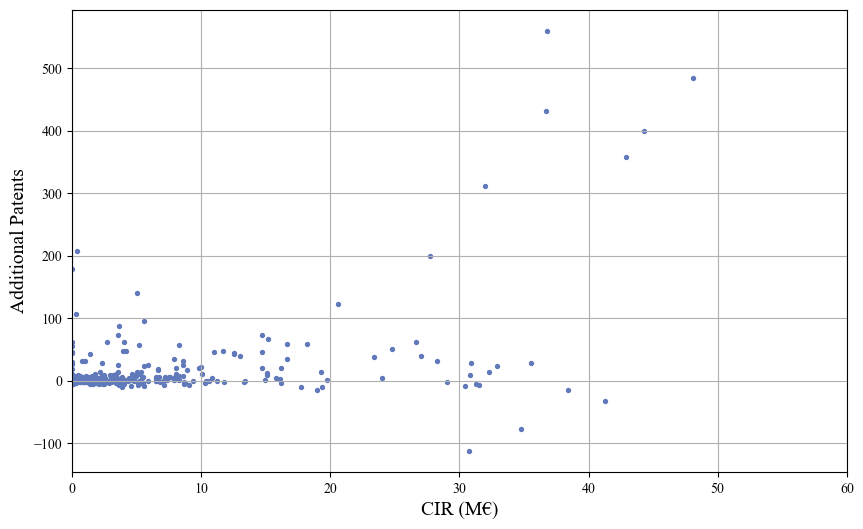

In [95]:
import matplotlib.pyplot as plt

# Définir une police spécifique (par exemple, "Times New Roman")
plt.rc('font', family='Times New Roman')

# Exemple de graphique
plt.figure(figsize=(10, 6))
plt.scatter(data_for_prediction_2['CIR'], data_for_prediction_2['delta_nb_brevets'], s=8, c='#6079BA')

plt.xlabel('CIR (M€)', fontsize=14)  # Modifier la taille et la police
plt.ylabel('Additional Patents', fontsize=14)
plt.xlim(0, 60)  # Limite pour l'axe des X

plt.grid(True)
plt.show()

In [96]:
import pandas as pd
from tabulate import tabulate  # Assurez-vous d'importer la fonction `tabulate`

# Étape 1 : Calculer la somme de delta_nb_brevets et CIR par entreprise (siren)
sums_by_siren = data_for_prediction_2.groupby('siren').agg(
    total_delta_nb_brevets=('delta_nb_brevets', 'sum'),
    total_CIR=('CIR', 'sum'),
    division=('division', 'first')  # on garde la division associée au siren
)

sums_by_siren = sums_by_siren[sums_by_siren['total_CIR'] != 0]

In [97]:
# Étape 2 : Calculer le rapport des sommes pour chaque entreprise
sums_by_siren['quotient'] = (sums_by_siren['total_delta_nb_brevets'] / sums_by_siren['total_CIR'])

# Étape 3 : Calculer la moyenne du quotient par secteur (division)
mean_quotient_by_sector = sums_by_siren.groupby('division')['quotient'].mean()

# Créer un tableau avec la somme des CIR et des brevets par secteur
sector_summary = sums_by_siren.groupby('division').agg(
    mean_quotient=('quotient', 'mean')
)

# Affichage du tableau avec les résultats
# Convertir le DataFrame en format tableau lisible
print("\nSummary Table of the mean per sector of additional patents for each million unit of CI")
print(tabulate(sector_summary, headers='keys', tablefmt='pretty', showindex=True))



Summary Table of the mean per sector of additional patents for each million unit of CI
+----------+----------------------+
| division |    mean_quotient     |
+----------+----------------------+
|    20    |  2.556847600406598   |
|    21    | -10.228064987268198  |
|    22    | -0.21258725308427096 |
|    25    |  6.2054181715731325  |
|    26    |  0.4121617634116113  |
|    29    |  -0.446217282986455  |
|    30    |  19.54251984725605   |
|    32    |  7466.468041660034   |
|    62    | -1.4203729392068216  |
|    71    |  -5.59028360097023   |
|    72    |  -4.278606475972407  |
+----------+----------------------+


In [98]:
# Étape 1 : Calculer la somme de delta_nb_brevets et CIR par entreprise (siren)
sums_by_siren = data_for_prediction_2.groupby('siren').agg(
    total_delta_nb_brevets=('delta_nb_brevets', 'sum'),
    total_CIR=('CIR', 'sum'),
    division=('division', 'first'),
    Id_ETI = ('idEti', 'first') # on garde la division associée au siren
)
sums_by_siren = sums_by_siren[sums_by_siren['total_CIR'] != 0]
# Étape 2 : Calculer le rapport des sommes pour chaque entreprise
sums_by_siren['quotient'] = sums_by_siren['total_delta_nb_brevets'] / sums_by_siren['total_CIR']

# Étape 3 : Calculer la moyenne du quotient par secteur (division)
mean_quotient_by_sector = sums_by_siren.groupby('Id_ETI')['quotient'].mean()

# Créer un tableau avec la somme des CIR et des brevets par secteur
sector_summary = sums_by_siren.groupby('Id_ETI').agg(
    mean_quotient=('quotient', 'mean')
)

# Affichage du tableau avec les résultats
# Convertir le DataFrame en format tableau lisible
print("\nSummary Table per size of company:")
print(tabulate(sector_summary, headers='keys', tablefmt='pretty', showindex=True))



Summary Table per size of company:
+--------+---------------------+
| Id_ETI |    mean_quotient    |
+--------+---------------------+
|   0    | 1133.2266410077034  |
|   1    | -3.7647887022343207 |
+--------+---------------------+


# Problème des zeros

In [99]:
model = smf.ols('np.log(0.1+brevets) ~ 1+ RetD*C(division, Treatment("72"))+ C(annee) + C(idEti, Treatment("0")) + dateCreationUniteLegale', data=panel_237)

# Ajuster le modèle
result = model.fit()

# Résumé des résultats
print(result.summary())

                              OLS Regression Results                             
Dep. Variable:     np.log(0.1 + brevets)   R-squared:                       0.333
Model:                               OLS   Adj. R-squared:                  0.317
Method:                    Least Squares   F-statistic:                     21.40
Date:                   Fri, 22 Nov 2024   Prob (F-statistic):           4.44e-83
Time:                           09:46:31   Log-Likelihood:                -2398.0
No. Observations:                   1185   AIC:                             4852.
Df Residuals:                       1157   BIC:                             4994.
Df Model:                             27                                         
Covariance Type:               nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [100]:
model = smf.ols('np.log(0.01+brevets) ~ 1+ RetD*C(division, Treatment("72"))+ C(annee) + C(idEti, Treatment("0")) + dateCreationUniteLegale', data=panel_237)

# Ajuster le modèle
result = model.fit()

# Résumé des résultats
print(result.summary())

                              OLS Regression Results                              
Dep. Variable:     np.log(0.01 + brevets)   R-squared:                       0.263
Model:                                OLS   Adj. R-squared:                  0.246
Method:                     Least Squares   F-statistic:                     15.29
Date:                    Fri, 22 Nov 2024   Prob (F-statistic):           2.86e-59
Time:                            09:46:31   Log-Likelihood:                -2894.5
No. Observations:                    1185   AIC:                             5845.
Df Residuals:                        1157   BIC:                             5987.
Df Model:                              27                                         
Covariance Type:                nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

# Count models

In [101]:
# Ajuster un modèle binomial négatif
model = smf.negativebinomial('brevets ~ 1+ RetD*C(division, Treatment("72"))+ C(annee) + C(idEti, Treatment("0")) + dateCreationUniteLegale', data=panel_237)

# Ajuster le modèle
result = model.fit()

# Résumé des résultats
print(result.summary())

         Current function value: 2.423710
         Iterations: 35
         Function evaluations: 71
         Gradient evaluations: 69
                     NegativeBinomial Regression Results                      
Dep. Variable:                brevets   No. Observations:                 1185
Model:               NegativeBinomial   Df Residuals:                     1157
Method:                           MLE   Df Model:                           27
Date:                Fri, 22 Nov 2024   Pseudo R-squ.:                  0.1256
Time:                        09:46:32   Log-Likelihood:                -2872.1
converged:                      False   LL-Null:                       -3284.5
Covariance Type:            nonrobust   LLR p-value:                2.307e-156
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept         

/Users/eleonoregrison/miniconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3379: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
/Users/eleonoregrison/miniconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3379: RuntimeWarning: invalid value encountered in multiply
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
/Users/eleonoregrison/miniconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3663: RuntimeWarning: overflow encountered in exp
  return np.exp(linpred)
/Users/eleonoregrison/miniconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3470: RuntimeWarning: invalid value encountered in multiply
  dparams = exog*a1 * (y-mu)/(mu+a1)
/Users/eleonoregrison/miniconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3470: RuntimeWarning: invalid value encountered in divide
  dparams = exog*a1 * (y-mu)/(mu+a1